## Background:
In 1998, the World Bank declared that India accounted for 40% of the world’s malnourished children [(World Bank, 1998)](https://documents1.worldbank.org/curated/en/333581468771353670/pdf/multi-page.pdf).  With the objective of reducing child malnutrition and improving education in India, in 1995,  the central government implemented the mid-day meal scheme (now known as PM Poshan meal scheme). Aiming to feed 120 million students attending government-funded schools from grades 1 to 8, one cooked meal daily, with 1.2 million participating schools across India [(The borgen project)](https://borgenproject.org/indias-mid-day-meal-scheme/), additionally incentivizing disadvantaged children to attend school with a mid-day meal provided.

The initial execution of the mid-day meal scheme was faced with multiple challenges: such as discrimination by upper caste students refusing to eat their mid-deal meal as it was prepared by a Dalit, which is deemed as the lowest caste [(The Times of India, 2022)](https://borgenproject.org/indias-mid-day-meal-scheme/). Furthermore, there have been multiple instances of poor food hygiene practices in the preparation resulting in contamination, leading to several deaths. Recent cases highlight the likelihood of snakes found in the meals [(The Times of India, 2023)](https://timesofindia.indiatimes.com/city/kolkata/snake-found-in-mid-day-meal-in-west-bengal-several-children-fall-ill/articleshow/96875645.cms) and insecticide containers being used for cooking oil resulting in 22 student deaths and dozens hospitalized [(Hindustan Times, 2013)](https://www.hindustantimes.com/india/served-death-bihar-mid-day-meal-tragedy-kills-22-kids/story-QZeCmxjrpxPgtUnH24LC5O.html).

As a result, the scheme has been updated and reviewed regularly, enforcing guidelines and regulation to ensure high quality and quantity, in addition to reduced contamination in handling and preparation. The scheme’s objective heads in the right direction with reduction in malnourished children under 5 from 38.4% to 32.1% in 2021, according to the Ministry of Women and Child Development [(Ministry of Women and Child Development, 2021)](https://pib.gov.in/PressReleasePage.aspx?PRID=1781673).

Hence, this project aims to tackle the effectiveness of the scheme in increasing enrollment and educational outcomes, in addition to focusing on some key social variables.


## Literature Review:

School lunches are a popular policy tool employed by the developing world to increase school enrollment. Research documents that school lunches provide an “implicit subsidy” to parents by lowering the cost of schooling, and improve child nutrition and health, which in turn increases the returns to school (Dreze and Goyal).

Since its implementation in 2001, India’s mid-day meal scheme has provided robust grounds for academic exploration, with studies addressing the impact of the scheme on primary school enrollment, educational attainment and nutritional outcomes. In their 2015 paper, Jayaraman et al. use staggered implementation (quasi-natural experiment) of the scheme in government schools to measure the causal impact of midday meals across a panel of 500,000 schools, from 2002-2004. The paper finds that the scheme results in substantial increases in primary school enrollment, driven by early primary school responses to the program. 

Another paper by Bonds uses data from the 2004 Socio-Economic Survey, and propensity-score matching (PSM) is used to estimate the causal effect of the mid-day meal program on school participation. The paper also finds an increase in enrollment, and this impact is particularly salient for the lowest income groups, providing increased educational opportunity by making it affordable. For better or for worse, the scheme's causal effects remain understudied, due to the non-random nature of its assignment across the country. 

Regardless of the limitation, for our project, we build upon the causal enrollment estimates from Jayarman et al., in an attempt to study the effect of the mid-day meal scheme on educational outcomes of children, difference in impact by gender, caste and age.

## Hypothesis:

We posit that the mid day meal scheme led to an increase in school attendance rates (which was it’s primary objective at the time of launch), but it also had unintended positive impacts on other educational outcomes namely enrollment rates and gender diaparity. It is also hypothesized that the receipt of central and state grants to the school had a positive effect on enrolment and test scores of children in the school. 

We use a regression design to test these hypotheses.

## Methodology:
We use IHDS data for our analysis, in an attempt to measure the scheme’s effect on educational outcomes in primary school children: namely, we use enrollment data and test-scores for 8-11 year old school children from 204-05, after the scheme’s implementation. We attempt to measure the difference in impact by gender, caste and age. Another question we try to address is if the receipt of central and state grants to the school has a positive effect on enrollment and test scores of children in the school.


**Data:**

It includes a primary school survey which covered at least one public and (where present) one private school in each village or urban block, the primary sampling units (PSU). This school survey included a question regarding whether a midday meal was offered in the school. We also use test-scores, and self reported caste data from the survey participants. 

**Regression Design:**


## Dataset construction: 

We use the India Human Development Survey-II (IHDS-II), 2011-12, School Facilities as the raw dataset for our analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
#%conda install -c conda-forge pyreadstat --yes

In [2]:
# reading the raw dataset:
#ihds_raw = pd.read_stata('36151-0009-Data.dta')
ihds_raw = pd.read_csv('ihds.csv')
# display the dataset
print(ihds_raw.head())

      SURVEY             STATEID  DISTID  PSUID  SCHOOLID SQGOVT  SC9D  SC9M  \
0  IDHS-II 2  Jammu & Kashmir 01       2      1         1   Govt  23.0   6.0   
1  IDHS-II 2  Jammu & Kashmir 01       2      1         2    Pvt  23.0   6.0   
2  IDHS-II 2  Jammu & Kashmir 01       2      2         1   Govt  16.0   6.0   
3  IDHS-II 2  Jammu & Kashmir 01       2      2         2    Pvt  16.0   6.0   
4  IDHS-II 2  Jammu & Kashmir 01       2      3         1   Govt   9.0   7.0   

   SC9Y  SC10H  ...          SO40 SO41A      SO41B  SO41C           SO42A  \
0  12.0   10.0  ...       Mixed 3  No 0       No 0  Yes 1           Yes 1   
1  12.0    1.0  ...       Mixed 3  No 0       No 0  Yes 1           Yes 1   
2  12.0   12.0  ...  Separately 2   NaN  No toilet    NaN  Not Applicable   
3  12.0   11.0  ...  Separately 2  No 0       No 0  Yes 1            No 0   
4  12.0    1.0  ...  Separately 2   NaN  No toilet    NaN  Not Applicable   

            SO42B           SO42C  SO43H SO43M SO43A  
0

/tmp/ipykernel_108/3503804306.py:3: DtypeWarning: Columns (15,96) have mixed types. Specify dtype option on import or set low_memory=False.
  ihds_raw = pd.read_csv('ihds.csv')


In [3]:
# keeping required variables: 
ihds_var = ['SQGOVT','SCHOOLID','DISTID','STATEID','PSUID','PS1','PS4','PS5','PS6','PS6A','PS6B',
            'PS9','PS10','PS10A','PS10B','PS11A','PS11B','PS11C','PS11D','PS12','PS13B','PS13C',
            'PS17I','PS17K','PS19GB','PS19SB'
]
ihds = ihds_raw.loc[:, ihds_var]
ihds.head()

,SQGOVT,SCHOOLID,DISTID,STATEID,PSUID,PS1,PS4,PS5,PS6,PS6A,...,PS11B,PS11C,PS11D,PS12,PS13B,PS13C,PS17I,PS17K,PS19GB,PS19SB
0,Govt,1,2,Jammu & Kashmir 01,1,Government 1,1.0,2010.0,61.0,35.0,...,Yes 1,No 0,Yes 1,Pre 1st,0.0,0.0,Yes 1,No 0,0.0,0.0
1,Pvt,2,2,Jammu & Kashmir 01,1,"Pri. recog, not aided 3",1.0,2012.0,21.0,9.0,...,Yes 1,Yes 1,No 0,Pre 1st,0.0,3.0,No 0,No 0,150.0,150.0
2,Govt,1,2,Jammu & Kashmir 01,2,Government 1,1.0,2005.0,40.0,18.0,...,Yes 1,Yes 1,Yes 1,Pre 1st,0.0,3.0,Yes 1,No 0,0.0,0.0
3,Pvt,2,2,Jammu & Kashmir 01,2,Pri. aided and recognised 2,0.0,1994.0,30.0,11.0,...,Yes 1,Yes 1,Yes 1,Pre 1st,0.0,0.0,No 0,No 0,175.0,175.0
4,Govt,1,2,Jammu & Kashmir 01,3,Government 1,0.0,1974.0,57.0,26.0,...,Yes 1,Yes 1,Yes 1,Pre 1st,2.0,0.0,Yes 1,No 0,0.0,0.0


## Cleaning:

In [4]:
# filtering categorical columns:
categorical_cols = ihds.select_dtypes(include=['category']).columns.tolist()
# changing the dataset:
for col in categorical_cols:
    ihds[col] = ihds[col].astype('category')
# filtering observations:
for col in categorical_cols:
    if ihds[col].isnull().any():
        ihds[col] = ihds[col].cat.add_categories(['.']).fillna('.')
# encoding missing observations:
ihds = ihds.fillna('.')

We will be cleaning all variables for analysis -- because the original dataset uses inconsistent notation for encoding categories, we modify them. The dataset is sorted by State ID, District ID, and then Public Sector Unit ID (we have school level measures at the PSU level from IHDS).

In [5]:
# cleaning our variables:
ihds['PS1'] = ihds['PS1'].str.split('(\d+)',n=1,expand=True)[1]

#PS10A
ihds['PS10A'] = ihds['PS10A'].str.split('(\d+)',n=1,expand=True)[1]

#PS10B
ihds['PS10B'] = ihds['PS10B'].str.split('(\d+)',n=1,expand=True)[1]

# sorting by PSUID
ihds = ihds.sort_values(by=['PSUID'], ascending=True)

#Recoding to binary:

#PS10
ihds['PS10'] = ihds['PS10'].str.replace('Yes 1', "1")
ihds['PS10'] = ihds['PS10'].str.replace('No 0', "0")

#PS11A
ihds['PS11A'] = ihds['PS11A'].str.replace('Yes 1', "1")
ihds['PS11A'] = ihds['PS11A'].str.replace('No 0', "0")

#PS11B
ihds['PS11B'] = ihds['PS11B'].str.replace('Yes 1', "1")
ihds['PS11B'] = ihds['PS11B'].str.replace('No 0', "0")

#PS11C
ihds['PS11C'] = ihds['PS11C'].str.replace('Yes 1', "1")
ihds['PS11C'] = ihds['PS11C'].str.replace('No 0', "0")

#PS11D
ihds['PS11D'] = ihds['PS11D'].str.replace('Yes 1', "1")
ihds['PS11D'] = ihds['PS11D'].str.replace('No 0', "0")

#PS17I
ihds['PS17I'] = ihds['PS17I'].str.replace('Yes 1', "1")
ihds['PS17I'] = ihds['PS17I'].str.replace('No 0', "0")

#PS17K
ihds['PS17K'] = ihds['PS17K'].str.replace('Yes 1', "1")
ihds['PS17K'] = ihds['PS17K'].str.replace('No 0', "0")

#SQGOVT
ihds['SQGOVT'] = ihds['SQGOVT'].str.replace('Govt', "1")
ihds['SQGOVT'] = ihds['SQGOVT'].str.replace('Pvt', "0")

# setting the indices 
ihds.set_index(['STATEID','DISTID','PSUID'], inplace=True)

print(ihds.head())

                                SQGOVT  SCHOOLID PS1  PS4     PS5   PS6  PS6A  \
STATEID            DISTID PSUID                                                 
Jammu & Kashmir 01 2      1          1         1   1  1.0  2010.0  61.0  35.0   
Chhattisgarh 22    1      1          1         1   1  2.0  1960.0  41.0  25.0   
Uttar Pradesh 09   15     1          0         2   3  1.0  1975.0  30.0  12.0   
Maharashtra 27     27     1          0         2   5  0.0  2008.0  80.0  36.0   
                          1          1         1   1  0.0  1953.0  96.0  44.0   

                                 PS6B  PS9 PS10  ... PS11B PS11C PS11D  \
STATEID            DISTID PSUID                  ...                     
Jammu & Kashmir 01 2      1      57.0  6.0    1  ...     1     0     1   
Chhattisgarh 22    1      1      30.0  6.0    1  ...     0     0     0   
Uttar Pradesh 09   15     1      25.0  5.0    0  ...     0     0     0   
Maharashtra 27     27     1      75.0  6.0    0  ...     0    

In [6]:
# Converting strings to numeric:
ihds['PS6'] = pd.to_numeric(ihds['PS6'], errors='coerce')
ihds['PS6A'] = pd.to_numeric(ihds['PS6A'], errors='coerce')
ihds['PS6B'] = pd.to_numeric(ihds['PS6B'], errors='coerce')
ihds['PS9'] = pd.to_numeric(ihds['PS9'], errors='coerce')
ihds['PS10B'] = pd.to_numeric(ihds['PS10B'], errors='coerce')
ihds['PS4'] = pd.to_numeric(ihds['PS4'], errors='coerce')
ihds['PS19GB'] = pd.to_numeric(ihds['PS19GB'], errors='coerce')
ihds['PS19SB'] = pd.to_numeric(ihds['PS19GB'], errors='coerce')

In [7]:
# A dictionary for our column names:
new_column_names = {
	'PS1':"School Type",
	'PS4': "Distance from middle school",
	'PS5':"Opening date",
	'PS6':"Number of enrolled students",
	'PS6A':"Number of girls",
	'PS6B':"Average attendance",
	'PS9':"Class time per shift",
	'PS10':"Do children get mid day meal",
	'PS10A':"Type of meal",
	'PS10B':"Number of cooked meals per week",
	'PS11A':"Language of instruction-Hindi?",
	'PS11B':"Language of instruction-State language?",
	'PS11C':"Language of instruction-English",
	'PS11D':"Language of instruction-Other?",
	'PS12':"Class when school starts teaching English",
	'PS13B':"Do classes meet outside?",
	'PS13C':"Classrooms with students from more than one grade",
	'PS17I':"Kitchen for cooking meals",
	'PS17K':"Assistant for cook",
	'PS19GB':"Tuition Fee-General",
	'PS19SB':"Tuition Fee-SC/ST"

}

# Renaming variables based on the survey codebook:
ihds = ihds.rename(columns=new_column_names)

## Descriptive Statistics:

In [8]:
# now we run some summary tables for a couple of important variables:
ihds_meal = ihds['Do children get mid day meal'].value_counts()
ihds_students = ihds['Number of enrolled students'].describe()
ihds_girls = ihds['Number of girls'].describe()
ihds_tuition_1 = ihds['Tuition Fee-General'].describe()
ihds_tuition_2 = ihds['Tuition Fee-SC/ST'].describe()

print(ihds_meal, ihds_students, ihds_girls, ihds_tuition_1, ihds_tuition_2)

1    2452
0    1807
.       8
Name: Do children get mid day meal, dtype: int64 count    4250.000000
mean      203.995529
std       193.548413
min         4.000000
25%        86.000000
50%       150.000000
75%       250.000000
max      2000.000000
Name: Number of enrolled students, dtype: float64 count    4187.000000
mean       97.249821
std        97.254171
min         0.000000
25%        40.000000
50%        70.000000
75%       120.000000
max      1260.000000
Name: Number of girls, dtype: float64 count     4187.000000
mean       738.884643
std       2044.705330
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max      50000.000000
Name: Tuition Fee-General, dtype: float64 count     4187.000000
mean       738.884643
std       2044.705330
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max      50000.000000
Name: Tuition Fee-SC/ST, dtype: float64


In [9]:
# some variable transformations we need 
ihds['female_students'] = ihds['Number of girls']/ihds['Number of enrolled students']
ihds['attendance proportional'] = ihds['Average attendance']/ihds['Number of enrolled students']
ihds["AttendancePercent"]=ihds["Average attendance"]/ihds["Number of enrolled students"]
ihds["GirlsPercent"]=ihds["Number of girls"]/ihds["Number of enrolled students"]

## Analysis Using Regression, and some plots:

### 1: Does school attendance correlate with whether children get a mid-day meal?
For our first regression, we try to assess if the school attendance rates are affected by the provision of the meal -- since our data is accross Indian states, we expect this correlation to be high and positive, because government schools are mandated by the law to provide children with day-time mels under the provisions of the scheme, and this should increase the attendance of students from low income families who are motivated to attend by the meal-provision. 

                            OLS Regression Results                            
Dep. Variable:     Average attendance   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     73.72
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.25e-17
Time:                        18:04:44   Log-Likelihood:                -27895.
No. Observations:                4210   AIC:                         5.579e+04
Df Residuals:                    4208   BIC:                         5.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

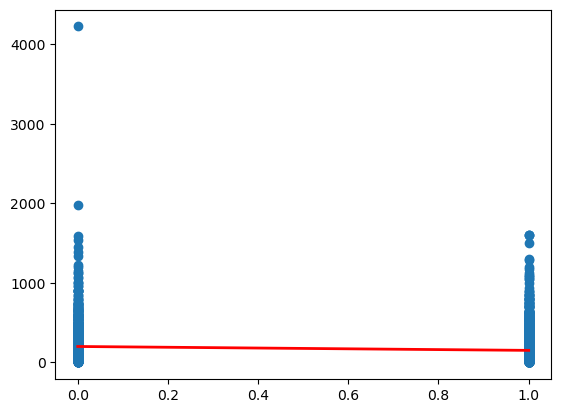

In [39]:
import statsmodels.api as sm #regression for school type and do children get meal 
# transforming some more variables
ihds["GirlsPercent"] = pd.to_numeric(ihds["GirlsPercent"], errors='coerce')
ihds["Number of enrolled students"] = pd.to_numeric(ihds["Number of enrolled students"], errors='coerce')
ihds["Average Attendance"] = pd.to_numeric(ihds["AttendancePercent"], errors='coerce')
ihds["Do children get mid day meal"] = pd.to_numeric(ihds["Do children get mid day meal"], errors='coerce')

# running our regression
mask = ~pd.isna(ihds["Average attendance"]) & ~pd.isna(["Do children get mid day meal"])
X = sm.add_constant(ihds["Do children get mid day meal"][mask])

# Fit the regression model
model = sm.OLS(ihds["Average attendance"][mask], X).fit()

# Print regression results
print(model.summary())

# plot the graph 
y = ihds["Average attendance"][mask]
plt.scatter(ihds["Do children get mid day meal"][mask], y, label='Actual Data')
plt.plot(ihds["Do children get mid day meal"][mask], model.predict(X), color='red', linewidth=2, label='Regression Line')

### 2: Class run-time and attendance correlates:

                             OLS Regression Results                             
Dep. Variable:     Class time per shift   R-squared:                       0.021
Model:                              OLS   Adj. R-squared:                  0.021
Method:                   Least Squares   F-statistic:                     90.55
Date:                  Thu, 07 Dec 2023   Prob (F-statistic):           2.92e-21
Time:                          17:49:32   Log-Likelihood:                -5387.2
No. Observations:                  4258   AIC:                         1.078e+04
Df Residuals:                      4256   BIC:                         1.079e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

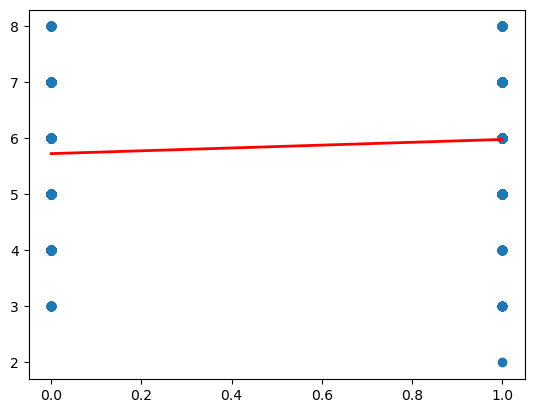

In [20]:
#  Class time and meal correlates 
ihds["Class time per shift"] = pd.to_numeric(ihds["Class time per shift"], errors='coerce')


mask = ~pd.isna(ihds["Class time per shift"]) & ~pd.isna(["Do children get mid day meal"])
X = sm.add_constant(ihds["Do children get mid day meal"][mask])

# Fit the regression model
model = sm.OLS(ihds["Class time per shift"][mask], X).fit()

# Print regression results
print(model.summary())

# plot the regression results
y = ihds["Class time per shift"][mask]
plt.scatter(ihds["Do children get mid day meal"][mask], y, label='Actual Data')
plt.plot(ihds["Do children get mid day meal"][mask], model.predict(X), color='red', linewidth=2, label='Regression Line')

### 

### 3: Does the number of meals provided affect attendance?

In [38]:
mask = ~pd.isna(ihds["Average attendance"]) & ~pd.isna(ihds["Number of cooked meals per week"])

# Use dropna to handle missing values and align indices
X = sm.add_constant(ihds["Number of cooked meals per week"][mask].dropna())
y = ihds["Average attendance"][mask].dropna()

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average attendance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1183
Date:                Thu, 07 Dec 2023   Prob (F-statistic):              0.731
Time:                        18:04:17   Log-Likelihood:                -15763.
No. Observations:                2419   AIC:                         3.153e+04
Df Residuals:                    2417   BIC:                         3.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### 4: Distance from school and average attendance:

In [41]:
mask = ~pd.isna(ihds["Average attendance"]) & ~pd.isna(ihds["Distance from middle school"])

# Use dropna to handle missing values and align indices
X = sm.add_constant(ihds["Distance from middle school"][mask].dropna())
y = ihds["Average attendance"][mask].dropna()

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average attendance   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.56
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.83e-05
Time:                        18:08:03   Log-Likelihood:                -27867.
No. Observations:                4201   AIC:                         5.574e+04
Df Residuals:                    4199   BIC:                         5.575e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 5: Enrollment rates and school distance:

In [42]:
mask = ~pd.isna(ihds["Number of enrolled students"]) & ~pd.isna(ihds["Distance from middle school"])

# Use dropna to handle missing values and align indices
X = sm.add_constant(ihds["Distance from middle school"][mask].dropna())
y = ihds["Number of enrolled students"][mask].dropna()

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Number of enrolled students   R-squared:                       0.006
Model:                                     OLS   Adj. R-squared:                  0.006
Method:                          Least Squares   F-statistic:                     24.71
Date:                         Thu, 07 Dec 2023   Prob (F-statistic):           6.91e-07
Time:                                 18:09:35   Log-Likelihood:                -28333.
No. Observations:                         4240   AIC:                         5.667e+04
Df Residuals:                             4238   BIC:                         5.668e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### 6: Enrollment of girls and mid-day meal provision:

                            OLS Regression Results                            
Dep. Variable:        Number of girls   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.251
Date:                Thu, 07 Dec 2023   Prob (F-statistic):             0.0220
Time:                        18:11:30   Log-Likelihood:                -25103.
No. Observations:                4187   AIC:                         5.021e+04
Df Residuals:                    4185   BIC:                         5.022e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

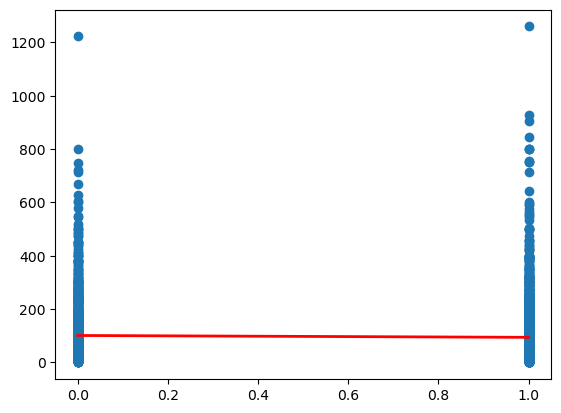

In [44]:
mask = ~pd.isna(ihds["Number of girls"]) & ~pd.isna(["Do children get mid day meal"])
X = sm.add_constant(ihds["Do children get mid day meal"][mask])

# Fit the regression model
model = sm.OLS(ihds["Number of girls"][mask], X).fit()

# Print regression results
print(model.summary())

# plot the regression results
y = ihds["Number of girls"][mask]
plt.scatter(ihds["Do children get mid day meal"][mask], y, label='Actual Data')
plt.plot(ihds["Do children get mid day meal"][mask], model.predict(X), color='red', linewidth=2, label='Regression Line')

## Some more plots:

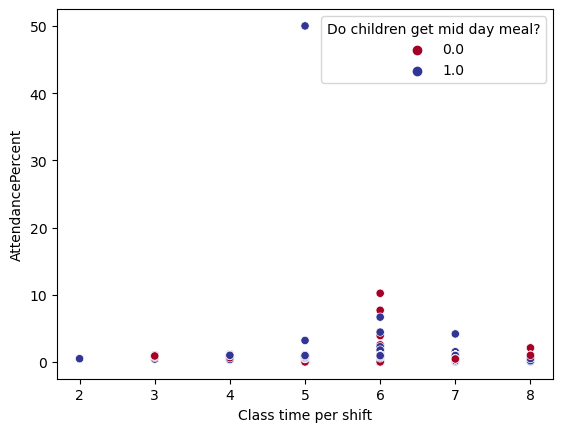

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have three arrays: x, y1, y2
# x: attendance percent
# y1: class time per shift
# binary_variable: Do children get mid day meal (0 or 1)

# Plot the scatter plot
sns.scatterplot(data=ihds, x='Class time per shift', y='AttendancePercent', hue='Do children get mid day meal', palette='RdYlBu')

# # Add the second continuous variable as size or marker style
# sns.scatterplot(data=data, x='x', y='y1', hue='binary_variable', size='y2', palette='RdYlBu')

# Add legend
plt.legend(title='Do children get mid day meal?')

# Show the plot
plt.show()


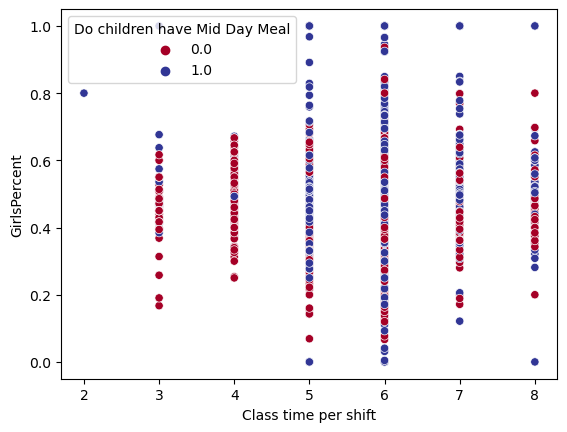

In [48]:
# Plot the scatter plot
sns.scatterplot(data=ihds, x='Class time per shift', y='GirlsPercent', hue='Do children get mid day meal', palette='RdYlBu')

# # Add the second continuous variable as size or marker style
# sns.scatterplot(data=data, x='x', y='y1', hue='binary_variable', size='y2', palette='RdYlBu')

# Add legend
plt.legend(title='Do children have Mid Day Meal')

# Show the plot
plt.show()


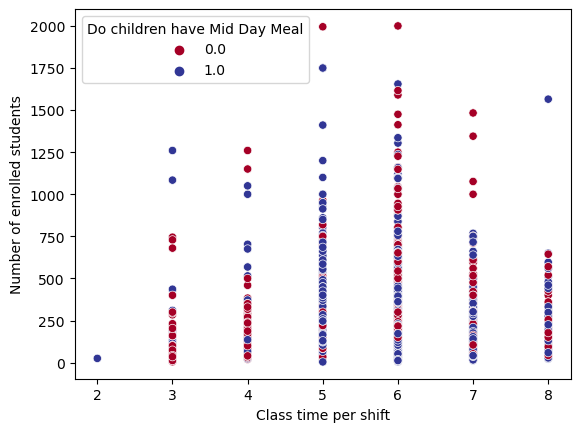

In [49]:
# Plot the scatter plot
sns.scatterplot(data=ihds, x='Class time per shift', y='Number of enrolled students', hue='Do children get mid day meal', palette='RdYlBu')

# # Add the second continuous variable as size or marker style
# sns.scatterplot(data=data, x='x', y='y1', hue='binary_variable', size='y2', palette='RdYlBu')

# Add legend
plt.legend(title='Do children have Mid Day Meal')

# Show the plot
plt.show()


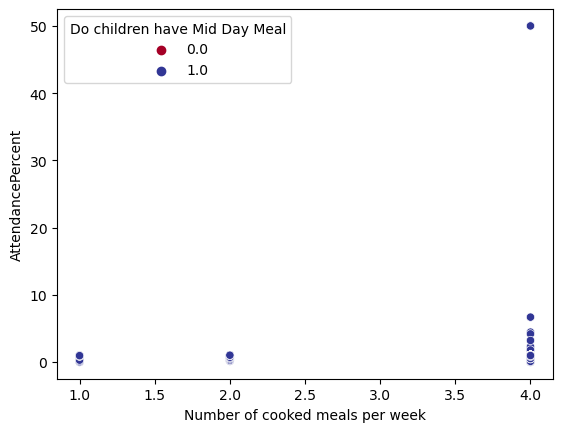

In [50]:
# Plot the scatter plot
sns.scatterplot(data=ihds, x='Number of cooked meals per week', y='AttendancePercent', hue='Do children get mid day meal', palette='RdYlBu')

# # Add the second continuous variable as size or marker style
# sns.scatterplot(data=data, x='x', y='y1', hue='binary_variable', size='y2', palette='RdYlBu')

# Add legend
plt.legend(title='Do children have Mid Day Meal')

# Show the plot
plt.show()


## Conclusion:


In conclusion, the application of regression analysis has provided valuable insights into the relationships and trends present within our dataset. We were able to examine multiple variables of interest and quantified their impact on whether students received a free mid day meal or not. Through a careful examination of the regression coefficients and p-values, we have gained a deeper understanding of the underlying factors driving the phenomenon under study. As we expected the implementation of the free mid-day meal to have positive impacts, the results of our regression imply otherwise.

Based on our results, it's observed through the coefficient of our independent variable: "Do children get Mid Day Meal" against multiple dependent variables such as: "AverageAttendance", "Class time per shift", "Number of girls", presenting coefficients of -48.905, 0.2531 and -6.9609 respectively. We observe a negative relationship for dependent variables "Average Attendance" and "Number of girls", which implies that when children do receive a meal, there is an apparent decrease in average attendance and number of girls. This does not align with our hypothesis, however, this could be explained through children who are more socioeconomically disadvantaged have lower attendance rates, are more likely to receive the meals. Similarly, with the increased incidents of food contamination resulting in hospitalization and deaths, students may have refused the mid day meals. On the contrary, there is a positive relationship between "Class time per shift" and "Do children get Mid Day Meal", implying that with every additional hour of class time shift, the probability of children receiving a mid-day meal increases by 0.2531 units. 

Similarly, when our observed independent variable is "Distance from Middle School", is against our dependent variables "AverageAttendance" and "Number of enrolled students", we observe coefficients of -6.4073 and -7.9963 respectively. Both inferring negative relationships between the two, suggesting every additional kilometer away from the middle school, the average attendance falls by 6.4073 units and number of students enrolled falls by 7.9963 units. 

To add on, when the independent variable is "Number of cooked meals" is against our dependent variable of "Average Attendance", it presents a positive coefficient of 2.9197. Suggesting that for every unit increase in number of cooked meals provided, the average attendance increases by 2.9197, implying that when more meals are available to students, they are more likely to attend school regularly. 

There is some discrepancies presented in our findings through contradicting relationships, however, all regression analysis except (AverageAttendance, Number of cooked meals) and (Number of girls, Do they get a mid day meal) present a 0.000 p-value, suggesting lack of statistical significance from the dataset. 


## Limitations:
Due to the non-random nature of its assignment across the country, it was not possible to fully undercover the causal effect of the mid-day meal scheme on various variables like attendance, enrollment and sex ratio in schools. 
Also, the dataset we used had some missing observations which would have affected our regressions and analysis to some extent since it would reduce the power. Also, if the schools having missing values are not random and share some specific characteristic, that might introduce some bias into our regression analysis.